In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# BASE
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=1000, n_features=1,
    bias=10, noise=5,
    random_state=42
)

feature_df = pd.DataFrame(X, columns=['feature'])
target_df = pd.DataFrame(y, columns=['target'])

df = pd.concat([
    feature_df, target_df
], axis=1)

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

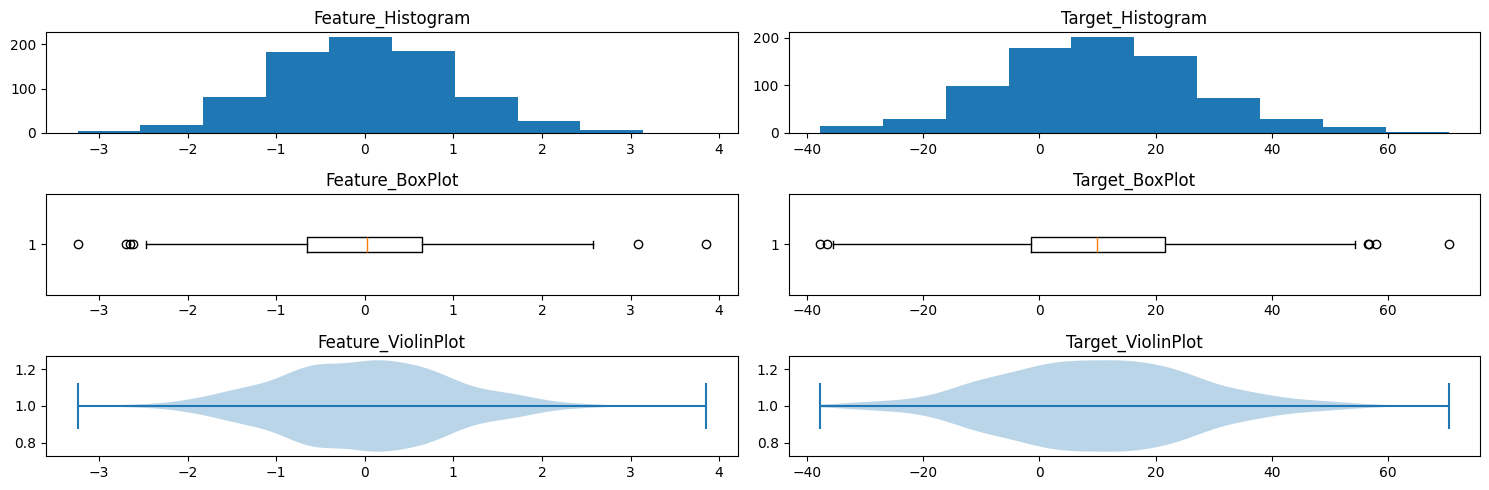

In [14]:
# plot
fig, axes = plt.subplots(3, 2, figsize=(15, 5))

ax = axes[0][0]
ax.hist(X_train['feature'])
ax.set_title('Feature_Histogram')

ax = axes[1][0]
ax.boxplot(X_train['feature'], vert=False)
ax.set_title('Feature_BoxPlot')

ax = axes[2][0]
ax.violinplot(X_train['feature'], vert=False)
ax.set_title('Feature_ViolinPlot')

ax = axes[0][1]
ax.hist(y_train)
ax.set_title('Target_Histogram')

ax = axes[1][1]
ax.boxplot(y_train, vert=False)
ax.set_title('Target_BoxPlot')

ax = axes[2][1]
ax.violinplot(y_train, vert=False)
ax.set_title('Target_ViolinPlot')

plt.tight_layout()
plt.show()

In [18]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const)
results_sm = ols_model.fit()

print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     8396.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:21:26   Log-Likelihood:                -2427.9
No. Observations:                 800   AIC:                             4860.
Df Residuals:                     798   BIC:                             4869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1019      0.178     56.704      0.0

In [ ]:
"""
1)
R-squared:                       0.913
-> 독립변수가 종속변수를 얼마나 잘 설명하는지 확인
독립변수가 종속변수의 변동의 91.3% 설명

2)
F-statistic:                     8396.
Prob (F-statistic):               0.00
-> 모델 전체가 유의미한지 검정
P값이 0.05 이하 (거의 0에 수렴) -> 모델이 통계적으로 유의미하다.

3)
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1019      0.178     56.704      0.000       9.752      10.452
feature       16.7536      0.183     91.627      0.000      16.395      17.112

-> 회귀모델 요약
const : 절편은 10.1019 이며, p_value가 0.05 이하로 유의미한 계수이다.
feature : 계수는 16.7536 이며, p_value가 0.05 이하로 유의미한 계수이다.

4)
==============================================================================
Omnibus:                        0.181   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.238
Skew:                           0.032   Prob(JB):                        0.888
Kurtosis:                       2.945   Cond. No.                         1.03
==============================================================================
-> 잔차분석 관련 

4_1)
Omnibus:                        0.181
Prob(Omnibus):                  0.914
-> prob이 0.05 이상으로, 잔차가 정규분포를 따른다.

4_2)
Durbin-Watson:                   1.978
-> 2와 근접한 값으로 잔차가 독립이다.

4_3)
Jarque-Bera (JB):                0.238
Prob(JB):                        0.888
-> prob이 0.05 이상으로 잔차가 정규성을 충족한다.

4_4)
Cond. No.                         1.03
-> 조건수 / 10보다 작아 다중공선성이 문제되지 않는다.
"""